# Final Project
## Neural network: Prediction on bike sharing demand

In [1]:
# Import

import folium
from folium.plugins import MarkerCluster

# data set
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# LSTM
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn import metrics
%matplotlib inline

### Importing the merged dataset

In [2]:
#dataset = pd.read_csv('Joint_dataframe.csv')

dataset = pd.read_csv(
    'April_to_June_3_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

# exclude timestamp column
#dataset = dataset.loc[:, dataset.columns!='timestamp']

In [3]:
dataset = dataset.drop(["index",'is_holiday','is_weekend'], axis = 1)
dataset = dataset.dropna(axis=0, how='any')
dataset

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,17,39,2,-22.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.197574,51.4996
2016-04-01,42,24,3,18.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.084606,51.5213
2016-04-01,51,30,4,21.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.120974,51.5301
2016-04-01,44,71,5,-27.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.156876,51.4931
2016-04-01,48,38,6,10.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.144229,51.5181
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-30,1,109,167,-108.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.147624,51.4940
2016-06-30,3,17,168,-14.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.195456,51.5004
2016-06-30,1,30,169,-29.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.165164,51.5147


In [4]:
location = pd.read_csv("Cycle hire docking stations.csv")

In [5]:
#dataset.to_csv (r'C:Desktop\dataframe.csv', index = False, header=True)

### Datasets for each stations

In [6]:
# Extract number of bikes leaving to the station
## for loop with 800 station
## put that info to 800 datasets

obj = dataset.groupby('Station Id')

In [7]:
obj.get_group(1)

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-02,13,22,1,-9.0,10.729167,9.458333,62.125000,14.833333,2.0,-0.109971,51.5292
2016-04-03,27,22,1,5.0,11.562500,11.041667,77.541667,11.312500,3.0,-0.109971,51.5292
2016-04-04,52,20,1,32.0,11.083333,10.500000,77.520833,13.583333,4.0,-0.109971,51.5292
2016-04-05,75,12,1,63.0,11.583333,10.916667,65.708333,14.916667,5.0,-0.109971,51.5292
2016-04-06,41,23,1,18.0,9.500000,7.208333,65.812500,26.437500,6.0,-0.109971,51.5292
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-25,11,9,1,2.0,16.062500,16.062500,73.458333,13.562500,25.0,-0.109971,51.5292
2016-06-26,48,26,1,22.0,16.604167,16.604167,71.145833,19.270833,26.0,-0.109971,51.5292
2016-06-27,23,22,1,1.0,18.062500,18.062500,68.958333,16.041667,27.0,-0.109971,51.5292


In [8]:
# add datasets to list

df = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]

#[35,79,80,179,198,205,237,259,283,285,342,369,385,413,414,415,416,417,418,422,429,434,438,439,493,497,
           #502,525,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df.append(obj.get_group(i))

## Neural network

2022-04-04 13:12:54.436813: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
4/4 [==============================] - 1s 3ms/step - loss: 0.9728 - accuracy: 0.0000e+00
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9726 - accuracy: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9726 - accuracy: 0.0000e+00
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9725 - accuracy: 0.0000e+00
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9723 - accuracy: 0.0000e+00
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9722 - accuracy: 0.0000e+00
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9721 - accuracy: 0.0000e+00
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9719 - accuracy: 0.0000e+00
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9718 - accuracy: 0.0000e+00
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9717 - accuracy: 0.0000e+00

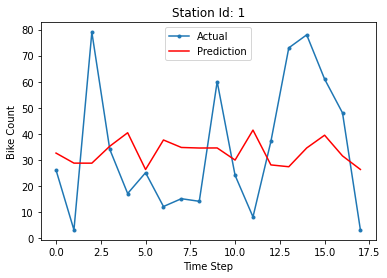

MAE: 22.132259051005047
MSE: 688.1649751334631
RMSE: 26.232898717706803
RMAE: 4.704493495691651


In [9]:
#X = df[i]['date'].values.reshape(-1,1) # reshape to make it two-dimentional
#y = df[i]['In'].values # Predict
    
X = df[1].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
y = df[1].values[:, 0:1] # 'In'
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler

PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X = PredictorScalerFit.transform(X)
y = TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### create ANN model ###

neural_network_model = keras.Sequential([
# Defining the Input layer and FIRST hidden layer, both are same!
layers.Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'),
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
layers.Dense(1, kernel_initializer='normal'),
])


# Fitting the ANN to the Training set
neural_network_model.compile(optimizer ='adam', loss ='mean_squared_error', metrics = ['accuracy'])
neural_network_model.fit(X_train, y_train, epochs = 50, batch_size = 20)

# Generating Predictions on testing data
pred = neural_network_model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
y_pred = TargetVarScalerFit.inverse_transform(pred)
 
# Scaling the y_test Price data back to original price scale
y_test_org = TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data = PredictorScalerFit.inverse_transform(X_test)
 
## Print heading
plt.title( 'Station Id: %d' % (1))
    
## Plotting in a graph form
plt.plot(y_test_org, marker='.', label="Actual")
plt.plot(y_pred, color='red', label="Prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

## Calculate error
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_org, y_pred))
print('MSE:', metrics.mean_squared_error(y_test_org, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_org, y_pred)))
print('RMAE:', np.sqrt(metrics.mean_absolute_error(y_test_org, y_pred)))
    

In [10]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list = [5, 10, 15, 20]
    epoch_list = [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData = pd.DataFrame(columns=['TrialNumber', 'batch_size', 'epochs', 'Accuracy'])
    
    # initializing the trials
    TrialNumber = 0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber += 1
            # create ANN model
            test_model = keras.Sequential([
            layers.Dense(units = 5, input_dim = X_train.shape[1], kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(units =5 , kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(1, kernel_initializer = 'normal'),
            ])

            # Compiling the model
            test_model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            test_model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test - test_model.predict(X_test)) / y_test))
            
            # printing the results of the current iteration
            #print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData = SearchResultsData.append(pd.DataFrame(data = [[TrialNumber, batch_size_trial, epochs_trial, 100-MAPE]],
                                                                      columns = ['TrialNumber', 'batch_size', 'epochs', 'Accuracy'] ))
    return SearchResultsData

In [11]:
result_df = FunctionFindBestParams(X_train, y_train, X_test, y_test)
result_df

,TrialNumber,batch_size,epochs,Accuracy
0,1,5,5,110.809137
0,2,5,10,110.652752
0,3,5,50,112.927223
0,4,5,100,107.599424
0,5,10,5,110.320455
0,6,10,10,110.448026
0,7,10,50,98.101635
0,8,10,100,98.445684
0,9,15,5,110.119628
0,10,15,10,110.182024


<AxesSubplot:xlabel='batch_size'>

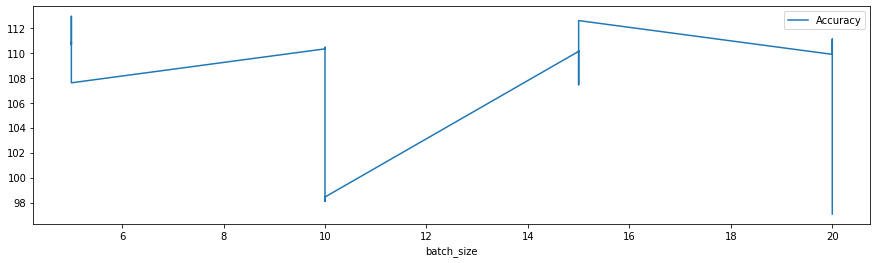

In [12]:
%matplotlib inline
result_df.plot(x='batch_size', y='Accuracy', figsize=(15,4), kind='line')

# parameters 
# e.g. 15-50
# 15 - batch size, 50 - epochs

In [13]:
return_df = result_df.loc[result_df['Accuracy'] == result_df['Accuracy'].max()]
print(return_df['batch_size'][0], return_df['epochs'][0])

5 50


Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9733 - accuracy: 0.0000e+00
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9730 - accuracy: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9728 - accuracy: 0.0000e+00
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9728 - accuracy: 0.0000e+00
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9727 - accuracy: 0.0000e+00
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9727 - accuracy: 0.0000e+00
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9727 - accuracy: 0.0000e+00
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9726 - accuracy: 0.0000e+00
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9726 - accuracy: 0.0000e+00
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9725 - accuracy: 0.0000e+00

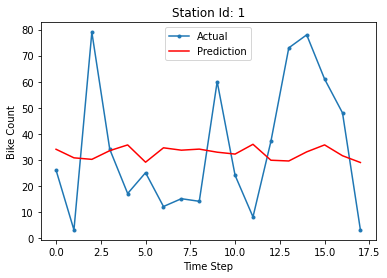

MAE: 21.984248373243545
MSE: 665.5257294672743
RMSE: 25.79778535974114
RMAE: 4.6887363301046845
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1720 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1716 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1715 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1711 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 1.1707 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 1.1702 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 1.1698 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 1.1695 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 1.1686 - accuracy: 0.0000e+00
Epoc

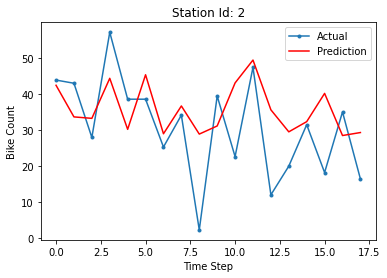

MAE: 10.153433052992746
MSE: 163.78274834939006
RMSE: 12.797763411994694
RMAE: 3.1864452063377375
Epoch 1/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7641 - accuracy: 0.0000e+00
Epoch 2/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7633 - accuracy: 0.0000e+00
Epoch 3/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7628 - accuracy: 0.0000e+00
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 0.7621 - accuracy: 0.0000e+00
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 0.7614 - accuracy: 0.0000e+00
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 0.7607 - accuracy: 0.0000e+00
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 0.7600 - accuracy: 0.0000e+00
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 0.7595 - accuracy: 0.0000e+00
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 0.7590 - accuracy: 0.0000e+00
Ep

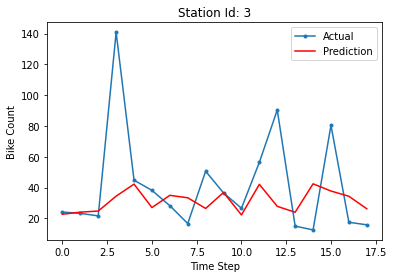

MAE: 20.18584387236872
MSE: 1093.9622382097978
RMSE: 33.07509997278614
RMAE: 4.492865886310065
Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 1.1012 - accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 1.1009 - accuracy: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 0s 1ms/step - loss: 1.1007 - accuracy: 0.0000e+00
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 1.1007 - accuracy: 0.0000e+00
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 1.1009 - accuracy: 0.0000e+00
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 1.1007 - accuracy: 0.0000e+00
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 1.1006 - accuracy: 0.0000e+00
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 1.1004 - accuracy: 0.0000e+00
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1002 - accuracy: 0.0000e

8/8 [==============================] - 0s 2ms/step - loss: 1.0178 - accuracy: 0.0000e+00
Epoch 81/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0183 - accuracy: 0.0000e+00
Epoch 82/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0179 - accuracy: 0.0000e+00
Epoch 83/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0175 - accuracy: 0.0000e+00
Epoch 84/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0171 - accuracy: 0.0000e+00
Epoch 85/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0169 - accuracy: 0.0000e+00
Epoch 86/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0153 - accuracy: 0.0000e+00
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0172 - accuracy: 0.0000e+00
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0159 - accuracy: 0.0000e+00
Epoch 89/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0174 - accuracy: 0.00

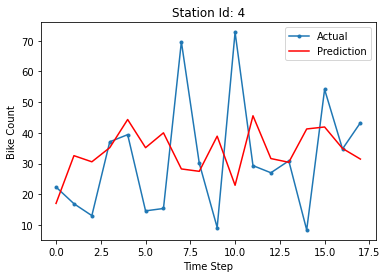

MAE: 16.269052352525414
MSE: 466.5149892750153
RMSE: 21.598958059939264
RMAE: 4.033491335372547
Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 1.0976 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 1.0977 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 1.0972 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 1.0972 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 1.0969 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 1.0967 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 1.0965 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 1.0962 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 1.0957 - accuracy: 0.0000

5/5 [==============================] - 0s 2ms/step - loss: 0.8765 - accuracy: 0.0000e+00
Epoch 81/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8751 - accuracy: 0.0000e+00
Epoch 82/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8746 - accuracy: 0.0000e+00
Epoch 83/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8729 - accuracy: 0.0000e+00
Epoch 84/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8698 - accuracy: 0.0000e+00
Epoch 85/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8680 - accuracy: 0.0000e+00
Epoch 86/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8665 - accuracy: 0.0000e+00
Epoch 87/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8647 - accuracy: 0.0000e+00
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8636 - accuracy: 0.0000e+00
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8621 - accuracy: 0.00

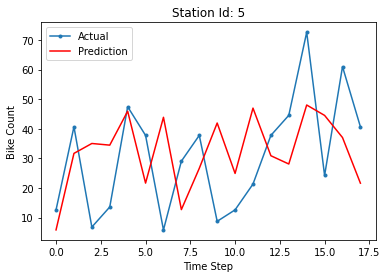

MAE: 18.37043259445177
MSE: 425.28579779584845
RMSE: 20.6224585778672
RMAE: 4.28607426375836
Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 1.1970 - accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 1.1965 - accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 1.1964 - accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 1.1962 - accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 1.1960 - accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 1.1957 - accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 1.1953 - accuracy: 0.0000e+00
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 1.1949 - accuracy: 0.0000e+00
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 1.1943 - accuracy: 0.0000e+00
Epoch 1

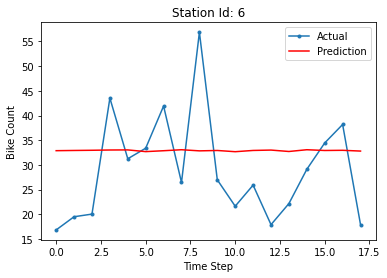

MAE: 9.462299163546737
MSE: 124.11175324385165
RMSE: 11.140545464377032
RMAE: 3.0760850384127445
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0099 - accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0097 - accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0094 - accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0093 - accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0092 - accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0091 - accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0090 - accuracy: 0.0000e+00
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0090 - accuracy: 0.0000e+00
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0089 - accuracy: 0.000

4/4 [==============================] - 0s 2ms/step - loss: 0.9244 - accuracy: 0.0000e+00
Epoch 81/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9238 - accuracy: 0.0000e+00
Epoch 82/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9221 - accuracy: 0.0000e+00
Epoch 83/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9217 - accuracy: 0.0000e+00
Epoch 84/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9205 - accuracy: 0.0000e+00
Epoch 85/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9201 - accuracy: 0.0000e+00
Epoch 86/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9188 - accuracy: 0.0000e+00
Epoch 87/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9181 - accuracy: 0.0000e+00
Epoch 88/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9175 - accuracy: 0.0000e+00
Epoch 89/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9164 - accuracy: 0.00

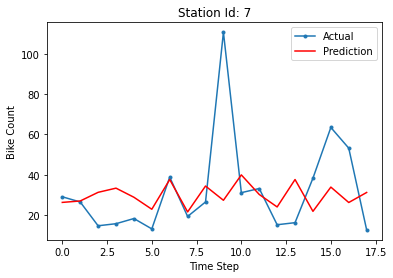

MAE: 15.893615933329297
MSE: 592.1827966818217
RMSE: 24.334806279932078
RMAE: 3.9866798132442614
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3817 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3785 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3763 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3746 - accuracy: 0.0000e+00
Epo

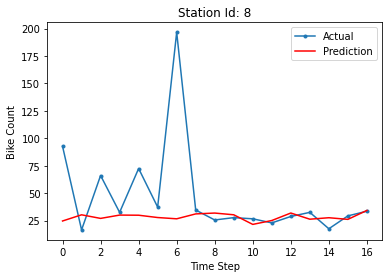

MAE: 22.86096731002513
MSE: 2202.6538984972344
RMSE: 46.932439724536316
RMAE: 4.781314391464457
Epoch 1/5
8/8 [==============================] - 0s 2ms/step - loss: 1.1045 - accuracy: 0.0000e+00
Epoch 2/5
8/8 [==============================] - 0s 1ms/step - loss: 1.1044 - accuracy: 0.0000e+00
Epoch 3/5
8/8 [==============================] - 0s 1ms/step - loss: 1.1039 - accuracy: 0.0000e+00
Epoch 4/5
8/8 [==============================] - 0s 1ms/step - loss: 1.1037 - accuracy: 0.0000e+00
Epoch 5/5
8/8 [==============================] - 0s 1ms/step - loss: 1.1036 - accuracy: 0.0000e+00


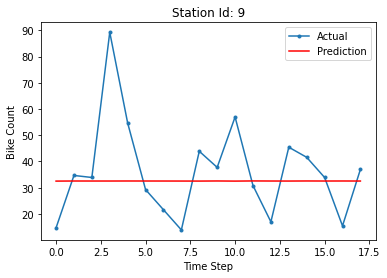

MAE: 13.12406519422784
MSE: 337.51873481650614
RMSE: 18.37168296091858
RMAE: 3.622715168796443

Error Calculation
Average MAE: 14.830395784671122
Average MSE: 607.153868633674
Average RMSE: 21.467153981209243
Average RMAE: 3.6154407433801294


In [14]:
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10
for i in range(1, no_station):
    
    X = df[i].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df[i].values[:, 0:1] # 'In'
 
    ### Sandardization of data ###
    from sklearn.preprocessing import StandardScaler

    PredictorScaler = StandardScaler()
    TargetVarScaler = StandardScaler()

    # Generating the standardized values of X and y
    X = PredictorScaler.fit(X).transform(X)
    y = TargetVarScaler.fit(y).transform(y)
 
    # Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    ### create ANN model ###

    neural_network_model = keras.Sequential([
    layers.Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'),
    layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
    layers.Dense(1, kernel_initializer='normal'),
    ])

    # Fitting the ANN to the Training set
    neural_network_model.compile(optimizer ='adam', loss ='mean_squared_error', metrics = ['accuracy'])
    
    # find best parameters
    result_df = FunctionFindBestParams(X_train, y_train, X_test, y_test)
    return_df = result_df.loc[result_df['Accuracy'] == result_df['Accuracy'].max()]
    best_batch_size = int(return_df['batch_size'][0])
    best_epochs = int(return_df['epochs'][0])
    
    neural_network_model.fit(X_train, y_train, batch_size = best_batch_size,  epochs = best_epochs)

    pred = neural_network_model.predict(X_test)
    y_pred = TargetVarScalerFit.inverse_transform(pred)
 
    y_test_org = TargetVarScalerFit.inverse_transform(y_test)
    Test_Data = PredictorScalerFit.inverse_transform(X_test)
 
    ## Print heading
    plt.title( 'Station Id: %d' % (i))
    
    ## Plotting in a graph form
    plt.plot(y_test_org, marker='.', label="Actual")
    plt.plot(y_pred, color='red', label="Prediction")
    plt.ylabel('Bike Count')
    plt.xlabel('Time Step')
    plt.legend()
    plt.show();

    ## Calculate error
    from sklearn import metrics
    MAE = metrics.mean_absolute_error(y_test_org, y_pred)
    MSE = metrics.mean_squared_error(y_test_org, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test_org, y_pred))
    RMAE = np.sqrt(metrics.mean_absolute_error(y_test_org, y_pred))
    
    print('MAE:', MAE)
    print('MSE:', MSE)
    print('RMSE:', RMSE)
    print('RMAE:', RMAE)
    totalMAE += MAE
    totalMSE += MSE
    totalRMAE += RMSE
    totalRMSE += RMAE

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)
    

- https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/